In [1]:
# загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Alex\AppData\Local\Temp\ipykernel_7912\2021626946.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
boston_df = pd.read_csv(r'C:\Users\Alex\data_analysis\linear_regression_train\boston_houses\boston.csv')

In [6]:
# Информация об атрибутах (по порядку):
#          - CRIM Уровень преступности на душу населения по городам
#          - ZN доля жилых земель, зонированных для участков площадью более 25 000 кв. футов.
#          - INDUS доля площадей под неторговую деятельность на город
#          - CHAS Фиктивная переменная CHAS Charles River (= 1, если тракт ограничивает реку; 0 в противном случае)
#          - NOX Концентрация оксидов азота NOX (частей на 10 миллионов)
#          - RM Среднее количество комнат в жилом помещении по РМ
#          - AGE ВОЗРАСТ Доля квартир, занимаемых владельцами, построенных до 1940 года.
#          - DIS взвешивает расстояния до пяти бостонских центров занятости.
#          - RAD индекс доступности радиальных автомобильных дорог RAD
#          - TAX НАЛОГ по ставке налога на имущество на полную стоимость за 10 000 долларов США.
#          - PTRATIO Соотношение учеников и учителей PTRATIO по городам
#          - B -  1000(Bk - 0,63)^2, где Bk - доля чернокожих по городам.
#          - LSTAT % более низкий статус населения
#          - MEDV Медианная стоимость домов, занимаемых владельцами, по MEDV, в 1000 долларов США.

In [7]:
# Каждая единица данных — это район города Бостон. У нас есть информация об уровне преступности (CRIM), качестве воздуха (NOX), транспортной доступности (RAD), налогах (TAX), количестве учителей (PTRATIO), социальном положении населения (LSTAT) и некоторые другие показатели. 
# Целевой переменной является медианная цена недвижимости в каждом из районов (MEDV). 
# Именно ее нам и нужно научиться предсказывать.

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
boston_df.shape

(506, 14)

In [11]:
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [12]:
# предварительная обработка данных

In [13]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
# исследовательский анализ данных

In [16]:
corr_matrix = boston_df.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


<Axes: >

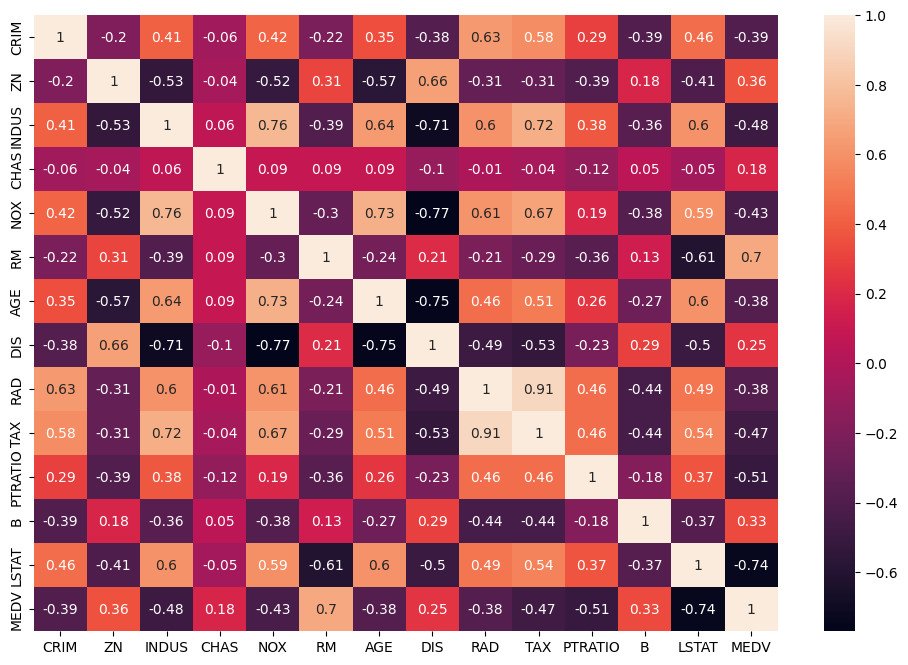

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(boston_df.corr().round(2),annot=True)

In [21]:
# В ней, в частности, мы видим (смотрите на последний столбец или строку), что переменные RM и LSTAT имеют достаточно сильную корреляцию с целевой переменной MEDV, 0,70 и −0,74

In [27]:
# подготовим данные для проверки взаимосвязи RM/LSTAT/MEDV
x1 = boston_df['LSTAT']
x2 = boston_df['RM']
y = boston_df['MEDV']

Text(0.5, 1.0, 'Социальный статус населения и цены на жилье')

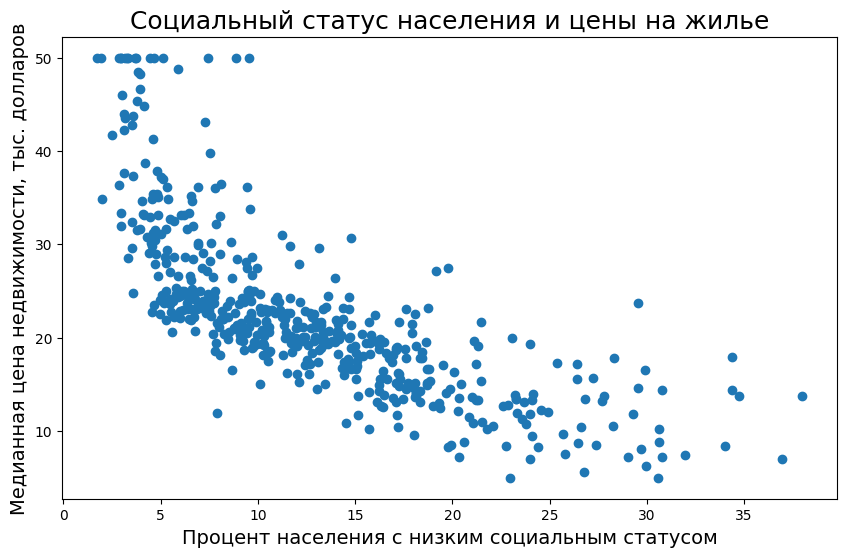

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(x1,y)

# добавим подписи
plt.xlabel('Процент населения с низким социальным статусом', fontsize = 14)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 14)
plt.title('Социальный статус населения и цены на жилье', fontsize = 18)

Text(0.5, 1.0, 'Среднее количество комнат и цены на жилье')

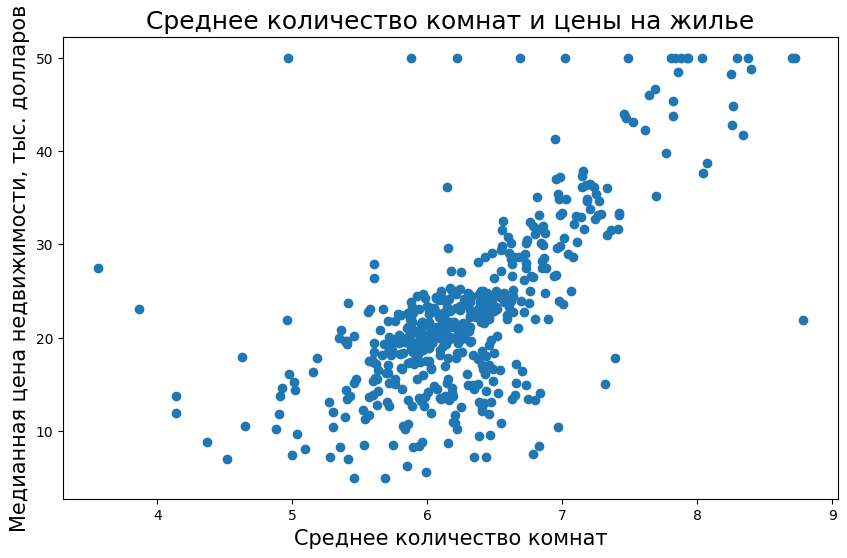

In [30]:
# зададим размер и построим второй график
plt.figure(figsize = (10,6))
plt.scatter(x2, y)
 
# добавим подписи
plt.xlabel('Среднее количество комнат', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Среднее количество комнат и цены на жилье', fontsize = 18)

In [31]:
# отбор и выделение признаков

In [32]:
X = boston_df[['RM', 'LSTAT','PTRATIO','TAX', 'INDUS']]
y = boston_df['MEDV']

In [33]:
# обучение модели и оценка качества

In [34]:
# импортируем необходимые библиотеки и разделим данные на тренировочные и данные

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
# проверка размерности тренировочной выборки
print(X_train.shape,y_train.shape)

(354, 5) (354,)


In [38]:
# проверка размерности тестовой выборки
print(X_test.shape, y_test.shape)

(152, 5) (152,)


In [39]:
# обучим модель и сделаем прогноз

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)
print(y_pred[:5])

[26.62981059 31.10008241 16.95701338 25.59771173 18.09307064]


In [42]:
# оценим качество модели

In [44]:
from sklearn import metrics
# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения цен на жилье
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error (RMSE):  5.107447670220913


In [45]:
# Также рассчитаем новый для нас критерий качества — коэффициент детерминации (R2 или R-квадрат). 
# R2 показывает, какая доля изменчивости целевой переменной объясняется с помощью нашей модели

In [47]:
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.65


In [60]:
# -- дополнительные задания по регрессии

In [49]:
# Задание 1. Вновь загрузите данные по недвижимости в Бостоне.

In [61]:
b_df = pd.read_csv(r'boston.csv')

In [50]:
# Задание 2. Создайте датафрейм, добавьте целевую переменную и выведите первые семь строк.

In [62]:
b_df.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


In [51]:
# Задание 3. Постройте точечную диаграмму с переменными PTRATIO и MEDV. Какие выводы можно сделать на основе этого графика?

In [63]:
PTRATIO_d = b_df['PTRATIO']
y = b_df['MEDV']

Text(0.5, 1.0, 'PTRATIO / MEDV')

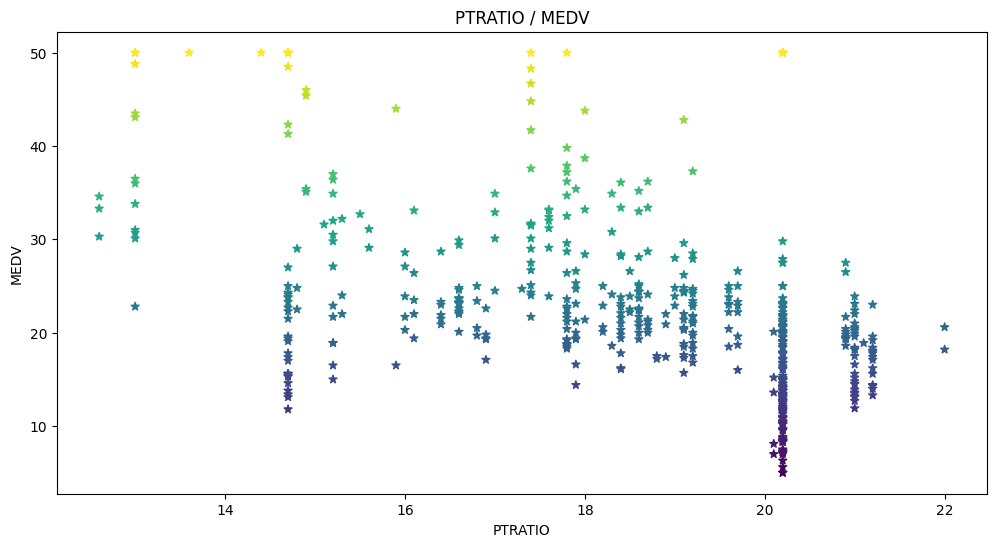

In [70]:
plt.figure(figsize=(12,6))
plt.scatter(PTRATIO_d, y,marker='*',c = y)
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.title('PTRATIO / MEDV')

In [52]:
# Построение и оценка качества модели

In [53]:
# Задание 4. Возьмите все признаки и поместите их в переменную X. Целевую переменную MEDV поместите в переменную y.

In [72]:
X = b_df.drop('MEDV', axis = 1)
y = b_df['MEDV']

In [54]:
# Задание 5. Разделите выборку на обучающую и тестовую части.

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.3)

In [74]:
# Задание 6. Постройте модель линейной регрессии. Сделайте прогноз и выведите первые три прогнозных значения.
from sklearn.linear_model import LinearRegression
model_b = LinearRegression()
model_b.fit(X_train,y_train)

LinearRegression()

In [75]:
y_pred = model_b.predict(X_test)

In [76]:
y_pred[:3]

array([28.64896005, 36.49501384, 15.4111932 ])

In [56]:
# Задание 7. Оцените качество модели через RMSE.

In [77]:
from sklearn import metrics
# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения цен на жилье
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error (RMSE):  4.638689926172808


In [58]:
# Задание 8. Оцените качество модели через R2. Какую долю изменчивости целевой переменной объясняет модель, учитывающая все признаки?

In [78]:
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.71
